<a href="https://colab.research.google.com/github/amol004/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering.



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **By**  -  Dipanshu Kumar


> (Cohort Azaadi)



# **Project Summary -**

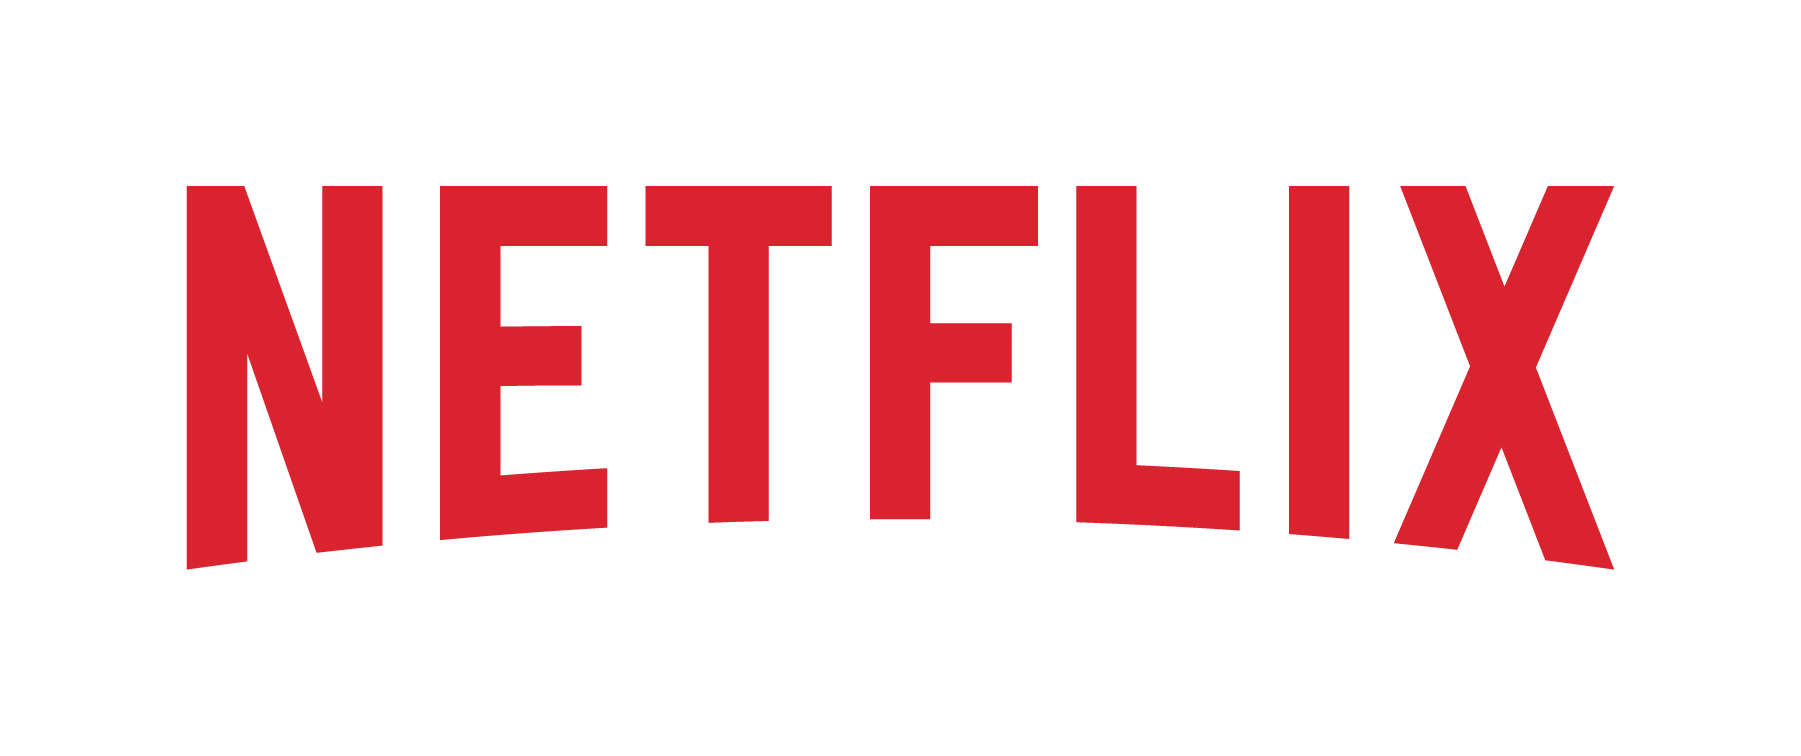

Netflix is the world's largest online streaming service provider, with more than 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.
We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

We started this project with the intention to obtain some useful insights related to the type of Netflix content. For this, we performed exploratory data analysis on our data after cleaning and making it easy to analyse. This analysis helped us to understand the trend.

Next we have made an unsupervised clustering model. For this, we processed our text by removing unuseful characters like - stop words, punctuation and did stemming. After getting the length for each text feature we rescaled them for generalisation and started applying algorithms. We have firstly used K-means clustering and using elbow method and silhouette score analysis the optimal number of clusters came out to be 4.Then we have used another clustering method and built the Agglomerative clustering algorithm, the optimal number of clusters came out to be 6. This was obtained after visualizing the dendrogram.A content based recommender system was built using the similarity matrix and obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched or searched.

References:-

*   towardsdatascience.com
*   medium.com
*   Kaggel.com
*   scikit-learn.org


# **GitHub Link -**

https://github.com/DipanshuKumar449/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

### **Objective** :

Our aim is to conduct an Exploratory Data Analysis to understand what content is available in different countries and if Netflix has been increasingly focusing on TV rather than movies in recent years. And use these insights to cluster similar content by matching text-based features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

# **Knowing the Data**

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For Hypothesis
from scipy.stats import *
import math

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string,re,unicodedata
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize, TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.metrics.pairwise import cosine_similarity

# Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Netflix Movies and Tv Shows Clustering - Dipanshu Kumar/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [ ]:
# Dataset First Look

# top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape
print(f'The total number of rows in the dataset : {df.shape[0]}')
print(f'The total number of columns in the dataset : {df.shape[1]}')

The total number of rows in the dataset : 7787
The total number of columns in the dataset : 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(f'The total number of null values in our dataset : {df.isnull().sum().sum()}')
print('-'*60)
print(df.isnull().sum())


The total number of null values in our dataset : 3631
------------------------------------------------------------
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [ ]:
# Percentage of null values.
for col in df.columns:
  null_percentage = df[col].isnull().sum() / len(df) * 100
  if null_percentage > 0:
    print(f'Percentage of null values in {col} : {null_percentage}%')

Percentage of null values in director : 30.679337357133683%
Percentage of null values in cast : 9.220495697958135%
Percentage of null values in country : 6.51085141903172%
Percentage of null values in date_added : 0.1284191601386927%
Percentage of null values in rating : 0.08989341209708489%


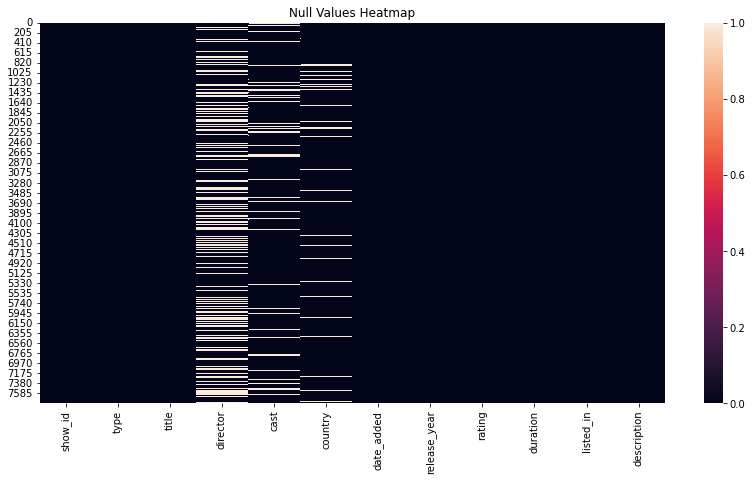

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14,7))

# using Heatmap to highlight the null values
sns.heatmap(df.isnull(), cbar=True)
plt.title("Null Values Heatmap")
plt.show()

### What did you know about your dataset?

The dataset, from above understanding consists of 7787 rows and 12.

There are a total of 3631 null values across the entire dataset with 2389 missing points in 'director',718 in 'cast', 570 in 'country', 10 in 'date_added', and 7 in 'rating' columns. **We will handle all null data points to enhance our understanding before doing the EDA and modeling**.

# **Understanding the Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

**1. show_id :** Unique ID for every Movie / Tv Show

**2. type :** Identifier - A Movie or TV Show

**3. title :** Title of the Movie / Tv Show

**4. director :** Director of the Movie

**5. cast :** Actors involved in the movie / show

**6. country :** Country where the movie / show was produced

**7. date_added :** Date it was added on Netflix

**8. release_year :** Actual Releaseyear of the movie / show

**9. rating :** TV Rating of the movie / show

**10. duration :** Total Duration - in minutes or number of seasons

**11. listed_in :** Genere

**12. description:** The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
  print(f'No. of unique values in {col} is : {df[col].nunique()}')

No. of unique values in show_id is : 7787
No. of unique values in type is : 2
No. of unique values in title is : 7787
No. of unique values in director is : 4049
No. of unique values in cast is : 6831
No. of unique values in country is : 681
No. of unique values in date_added is : 1565
No. of unique values in release_year is : 73
No. of unique values in rating is : 14
No. of unique values in duration is : 216
No. of unique values in listed_in is : 492
No. of unique values in description is : 7769


## **Data Preprossesing**

**The main reason of doing data preprocessing at this stage is to make our EDA more efficient** since from the above understanding we can see that there are a number of missing data in various column, that may give unwanted plots which do not make sense.So I have decided to atleast handle the NaN values.

### **Handling the missing values.**

There are two ways through which we can deal with the missing values either we trim it or else we can impute them with some values.

Since some of the columns is having large number of missing data. So, trimming will not be a good option as it makes the dataset thin.

We will therefore impute these missing values with some logical approches.

In [ ]:
# Handling Missing values to make our Dataset Manageable.

# For Categorical columns we will impute "Missing" in place of NaN
df[['director','cast','country']] = df[['director','cast','country']].fillna('Missing')

# For Rating column we will impute 0 in place of NaN
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [ ]:
# Checking the null values
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

Now we can see every null value is treated except for date_added column since,we can see that there are only 10 missing values so now we can trim it up.Also, we will convert this date column(which is present in String or Object format)  to Datetime format

In [ ]:
# Droping the remaining null values.

df.dropna(axis=0,inplace = True)

In [ ]:
# Checking the shape
df.shape

(7777, 12)

In [ ]:
# Adding new Features to our dataset.

# Typecasting 'date_added' from string to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
# Checking the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.9+ KB


In [ ]:
# Adding Month,Month name and Year columns

# Month column
df['month_added'] = df['date_added'].dt.month

# Month name column
df['month_name_added'] = df['date_added'].dt.month_name()

# Year column
df['year_added'] = df['date_added'].dt.year

In [ ]:
# Retrieving just the first country
df['origin_country'] = df['country'].apply(lambda x: x.split(",")[0])

In [ ]:
# Retrieving just the first i.e the main actor/actress from the cast
df['lead_actor'] = df['cast'].apply(lambda x: x.split(",")[0])

# **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables.**

**Exploratory Data Analysis (EDA)** is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

## **Type Column :**

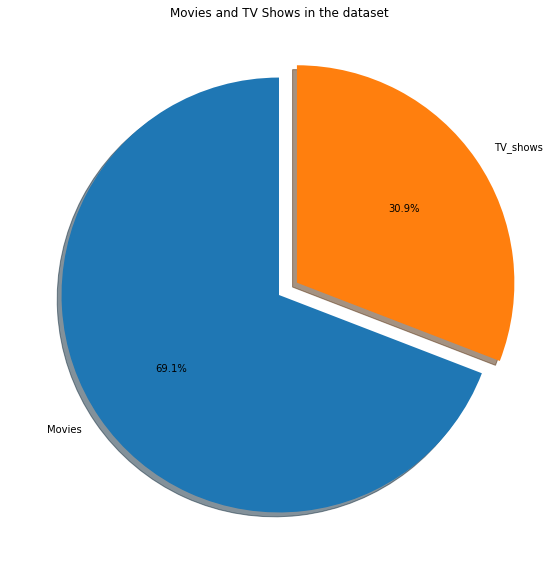

In [ ]:
# Chart - 1 visualization code

# Pieplot to represent the percentage of movies and tv_shows in type column.
plt.figure(figsize=(10,10))
labels = ['Movies','TV_shows']
explode = [0, 0.1]
plt.pie(df['type'].value_counts(), labels=labels, explode = explode, shadow = True, startangle=90, autopct='%1.1f%%')
plt.title('Movies and TV Shows in the dataset')
plt.show()

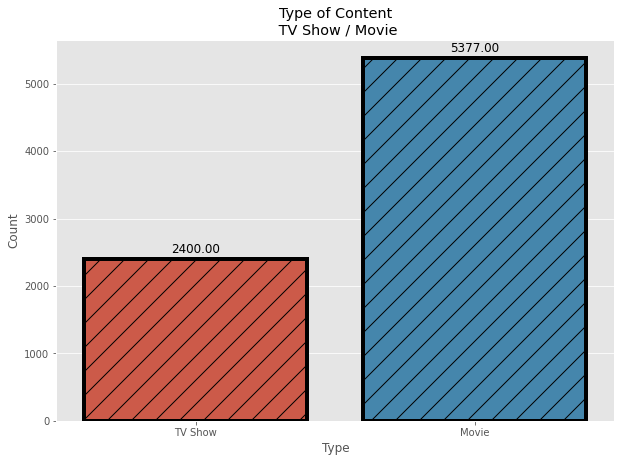

In [ ]:
# Chart-2 Visualization code

# Countplot to visualize the number of movies and tv_shows in type column.
plt.figure(figsize=(10,7))
plt.style.use('ggplot')
ax = sns.countplot('type',data = df, lw=4, ec='black',hatch='/')
plt.title('Type of Content\n TV Show / Movie')
plt.xlabel('Type')
plt.ylabel('Count')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=12)

plt.show()

##### 1. Why did you pick the specific chart?

We have made the use of two different types of charts to understand the Distribution of Type column.

**1.** Firstly by definition a **pie chart** is a circular statistical chart graph,which is divided into slices to illustrate numerical proportions.

It summarize a large data set into visual form.

Pie charts are easily understood due to its widespread use in business

Pie charts permit a visual check of the reasonableness or accuracy of the calculation.

Pie charts are visually simpler than other types of graphs.

**2.** The **countplot** is primarily used to display observational counts in different category-based bins using bars. In simple words a count plot can be thought of as a histogram across a categorical, instead of quantitative, variable it provides observations in each categorical bin using bars. The basic API and options are identical to those for barplot().


##### 2. What is/are the insight(s) found from the chart?

Trend of Movies added on Netflix is higher than TV Shows with
69% of data belonging to Movie class and 31% of data belong to TV show

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The displayed observational count in different type can give business a brief insight about what people like to consume from the platform. Since for shorter period to time movies fills the demand of the consumer whereas it is well known that tv shows take multiple days to complete from the users end.

## **Title Column:**

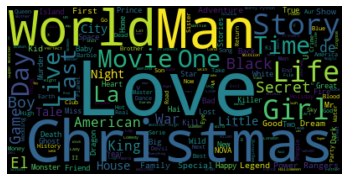

In [ ]:
# Chart - 3 visualization code

# text documents
text = " ".join(word for word in df['title'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

**Word Cloud** is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

##### 2. What is/are the insight(s) found from the chart?

Love,Christmas, World, Man, Story are the most common words apperaing in a movie title.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This may give an understanding about the word that are generally prefered while deciding the title of a movie or a tv shows by the makers. One thing is observed that the variety of words shows that the users will shows there interest in any topic inspite if the content shows value.

## **Rating column:**

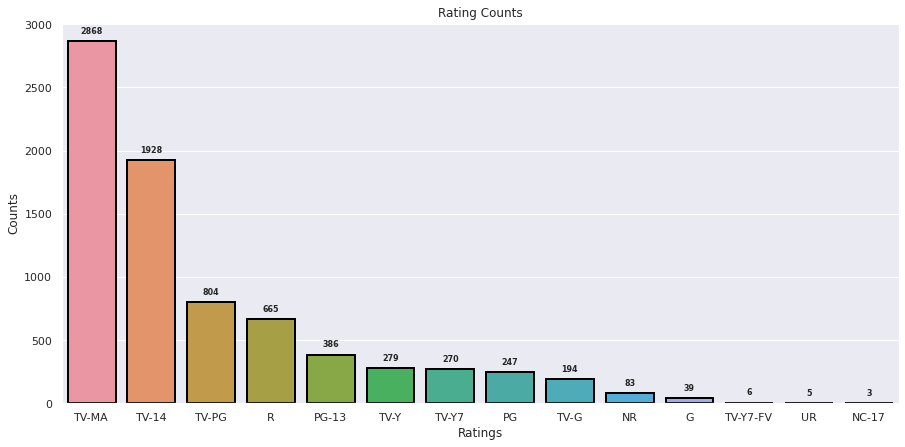

In [ ]:
# Chart - 4 visualization code

# Plotting the countplot for the ratings
plt.figure(figsize=(15,7))
sns.set(style = "darkgrid")
ax = sns.countplot('rating',data = df,lw=2, ec='black', order = df['rating'].value_counts().index)
plt.title('Rating Counts')
plt.xlabel('Ratings')
plt.ylabel('Counts')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),
  textcoords = 'offset points',fontsize=8, fontweight='bold')


##### 1. Why did you pick the specific chart?

The reasons are same as above, the countplot is primarily used to display observational counts in different category-based bins using bars. In simple words a count plot can be thought of as a histogram across a categorical, instead of quantitative, variable it provides observations in each categorical bin using bars.

This function i.e, countplot() always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

##### 2. What is/are the insight(s) found from the chart?

Most of the Movie and Tv shows have rating of TV-MA (Mature Audiance) i.e 2868 in numbers, then followed by TV-14 (younger audiance) i.e 1928.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ratings creates a great avenue for business to get current content on the platform and understand the attention of the user. That helps business to rank the choices higher in search results which can be more influential for future customers.

## **Month Column:**

**Month on which Movie / TV Show Released on Netflix**

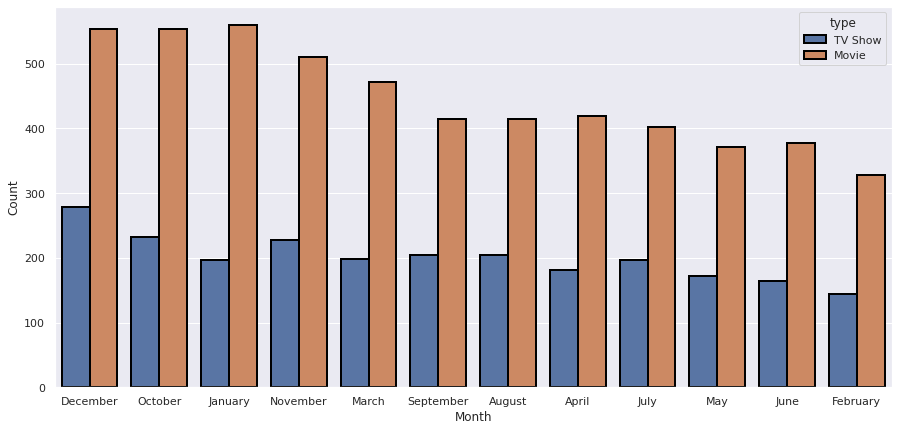

In [ ]:
# Chart - 5 visualization code

# Plotting the Countplot
plt.figure(figsize=(15,7))
sns.countplot(data = df,x ='month_name_added', hue='type',lw=2, ec='black',order = df['month_name_added'].value_counts().index)
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

The reasons are same as above, the countplot is primarily used to display observational counts in different category-based bins using bars. In simple words a count plot can be thought of as a histogram across a categorical, instead of quantitative, variable it provides observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

From October to January, maximum number of movies and TV shows were added on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the Month trend has a lots of benifits for the growth of a business.

IDENTIFIES THE SINGLE MOST IMPORTANT NUMBERS

HELPS IN BUILDING THE BUSINESS FUNNEL

LOOKS AT INCREASING THE CONVERSION RATE

HELPS IN PRIORITIZING EVERYTHING

## **Country Column:**



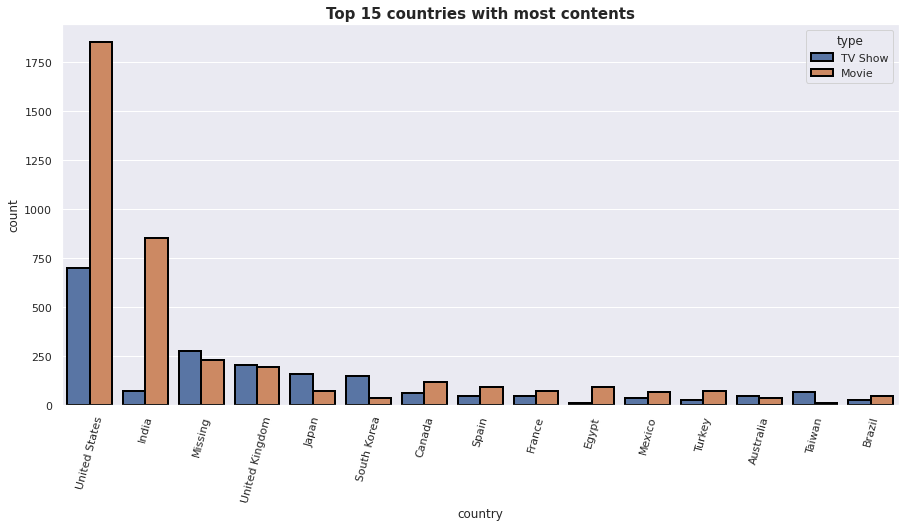

In [ ]:
# Chart - 6 visualization code

# Analysing top 15 countries with most content
plt.figure(figsize=(15,7))
sns.countplot(x = df['country'], lw=2, ec='black',order = df['country'].value_counts().index[0:15], hue = df['type'])
plt.xticks(rotation = 75)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

The reasons are same as above, the countplot is primarily used to display observational counts in different category-based bins using bars. In simple words a count plot can be thought of as a histogram across a categorical, instead of quantitative, variable it provides observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

The maximum number of Movies and TV shows were based out from United States, followed by India and UK

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above observation helps in gaining awareness of the dynamics of economics and gives ideas in generating the revenue for instance  it helps in understanding the stimulation of type consumption to taget the import and export of the content.

**From here onwards we will analyze the Movies and TV Shows Separately by creating individual dataframes to enhace our understanding.**

## **Year Column:**

**Releasing Year Trend**

In [ ]:
# Chart 7 Visulization code

# creating two extra variables, based onto our problem statement to enhance our EDA
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

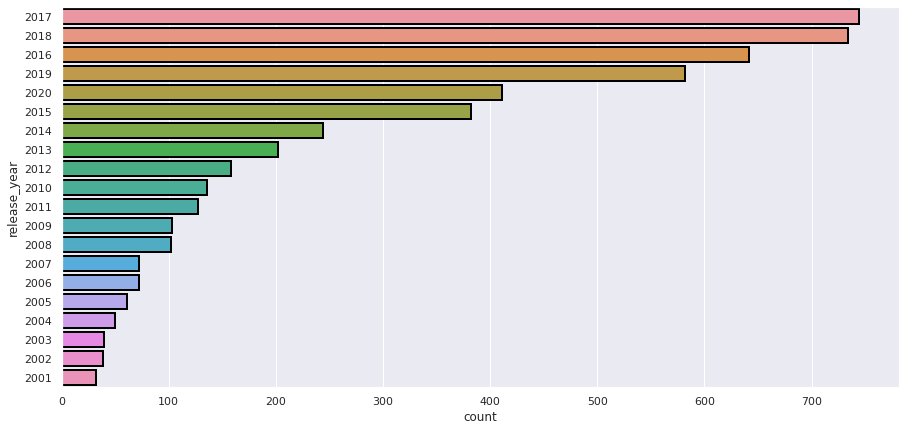

In [ ]:
# Analysing how many "Movies" released per year in this centuary
plt.figure(figsize=(15,7))
sns.countplot(data = movies,y = 'release_year',lw=2, ec='black',order = movies['release_year'].value_counts().index[0:20])
plt.show()

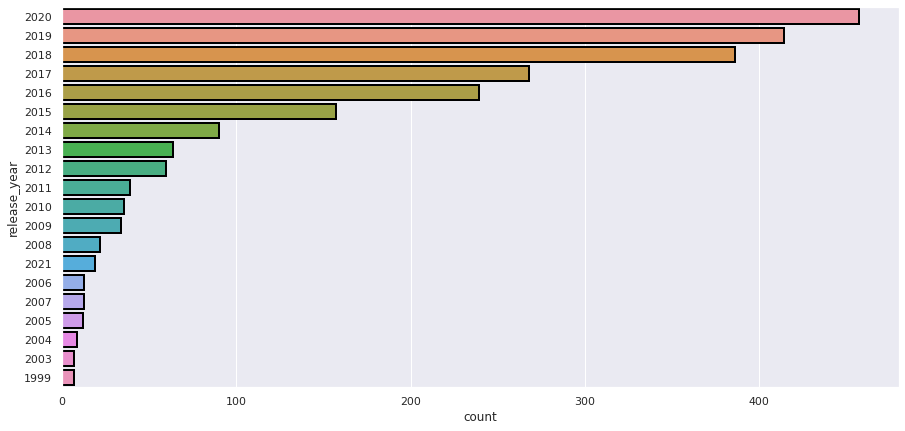

In [ ]:
# Chart - 8 visualization code

# Similarly Analysing how many "Tv_Shows" released per year in this centuary
plt.figure(figsize=(15,7))
sns.countplot(data = tv_shows,y= 'release_year',lw=2, ec='black', order = tv_shows['release_year'].value_counts().index[0:20])
plt.show()

##### 1. Why did you pick the specific chart?

In both the cases we have made the use of Horizontal countplot.

A horizontal bar plot is a plot that presents quantitative data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

##### 2. What is/are the insight(s) found from the chart?

**1. For Movies countplot:**
The maximum number of Movies were relesed in netflix in between 2015-2020 with the highest number of release on the year 2017.

**2. For TV Shows countplot:**
The maximum number of TV Shows were relesed in netflix in between 2015-2020 with the highest number of release on the year 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Sales, profits, and other metrics change during different periods of the year it give a brief idea about the ongoing trend and helps business understand the liking and disliking of the consumers.

## **Duration Column:**

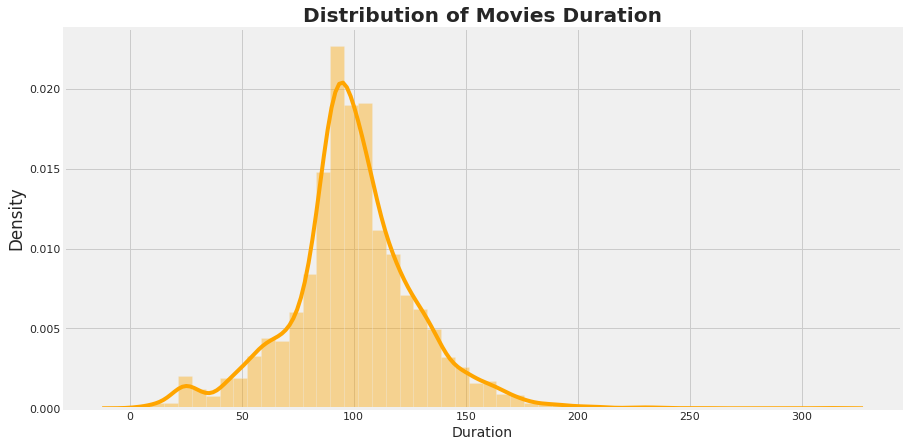

In [ ]:
# Chart - 9 visualization code

# Checking the distribution of Movies Durations
plt.figure(figsize=(15,7))
plt.style.use('fivethirtyeight')

# Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movies['duration'].str.extract('(\d+)'),color='orange')
plt.title('Distribution of Movies Duration',fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

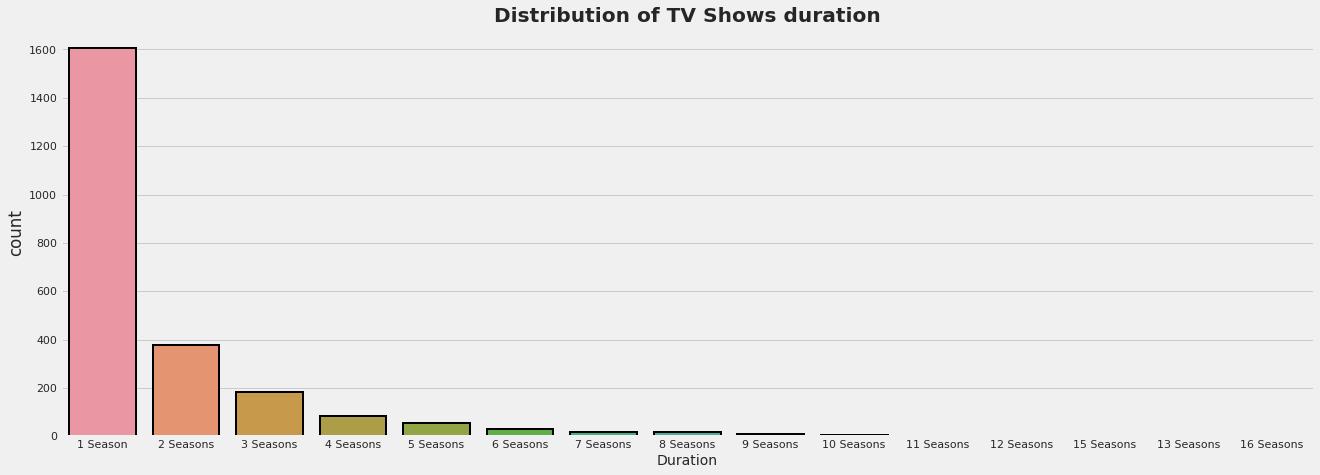

In [ ]:
# Chart - 10 visualization code

# Count plot highlighting the distribution of TV SHOWS
plt.figure(figsize=(20,7))
plt.style.use('fivethirtyeight')
sns.countplot(data=tv_shows,x=tv_shows['duration'],lw=2, ec='black',order = tv_shows['duration'].value_counts().index)
plt.title("Distribution of TV Shows duration",fontweight='bold')
plt.xlabel('Duration', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Here we have made the use of two different plots in order to determine the Duration distribution for movies and TV Shows.

**1.**Reason behind choosing **distplot**, as it depicts the variation in the data distribution and gives a brief insight about the skewness, from which we can make decision regarding transformation to be done or not.

In pace of it, also Distplot is used to observe how the data is distributed in a particular dataset. More specificly, distplot is one kind of Univariate Distribution Plot and works with single numerical variables.

**2.** The **countplot** is primarily used to display observational counts in different category-based bins using bars. In simple words a count plot can be thought of as a histogram across a categorical, instead of quantitative, variable it provides observations in each categorical bin using bars. The basic API and options are identical to those for barplot()

##### 2. What is/are the insight(s) found from the chart?

**1.**For **Movies** we clearly see that most of the Movies runtime lies in the range of 50 to 150.

**2.**For **TV Shows** most of it is having only 1 season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

One of a general rule of thumb for qualifying a movie as a financial success is the duration. The lenght of the movies may have a disasterous impact on the revenue, the main purpose of the makers in this segment is to keep the consumer engage with the content being delivered and now a days its a clear indication that the movies runtime has reduced.

## **Genres Column:**

**Famous Genres**

In [ ]:
# Seperating genre from listed_in columns for analysis purpose
movies_genres = movies['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Top 10 genre in listed movies
movies_genres = movies_genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
movies_genres[:10]

,genre,count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,Documentaries,786
4,Action & Adventure,721
5,Independent Movies,673
6,Children & Family Movies,532
7,Romantic Movies,531
8,Thrillers,491
9,Stand-Up Comedy,329


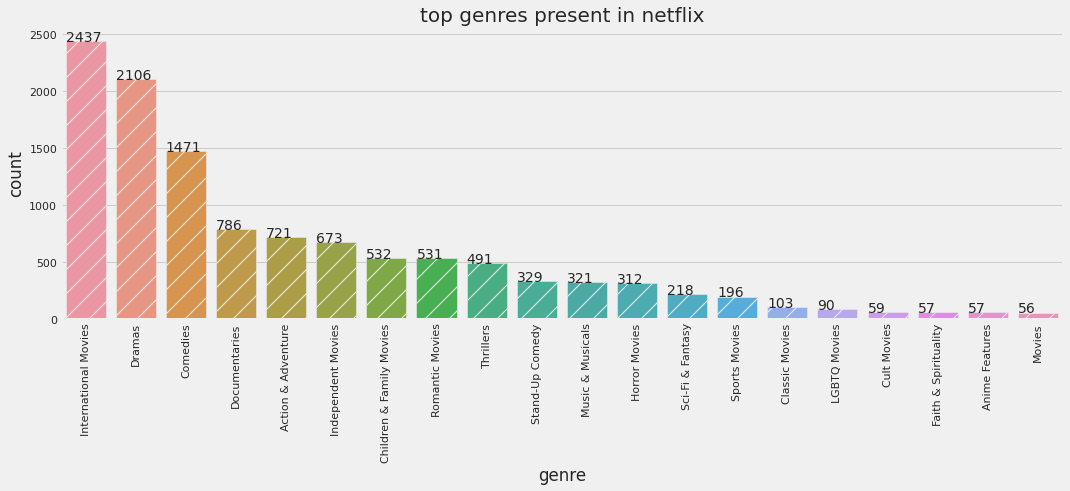

In [ ]:
# Chart - 11 visualization code

# Analysing top 10 "Movies" genre

# plotting graph
plt.figure(figsize=(16,5))
graph = sns.barplot(x='genre', y='count', data = movies_genres,hatch='/',)
graph.set_title('top genres present in netflix', size=20)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.show()

In [ ]:
# Seperating genre from listed_in columns for analysis purpose
tv_genres = tv_shows['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Top 10 genre in listed movies
tv_genres = tv_genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
tv_genres[:10]

,genre,count
0,International TV Shows,1198
1,TV Dramas,703
2,TV Comedies,518
3,Crime TV Shows,426
4,Kids' TV,412
5,Docuseries,352
6,Romantic TV Shows,333
7,British TV Shows,231
8,Reality TV,222
9,Korean TV Shows,150


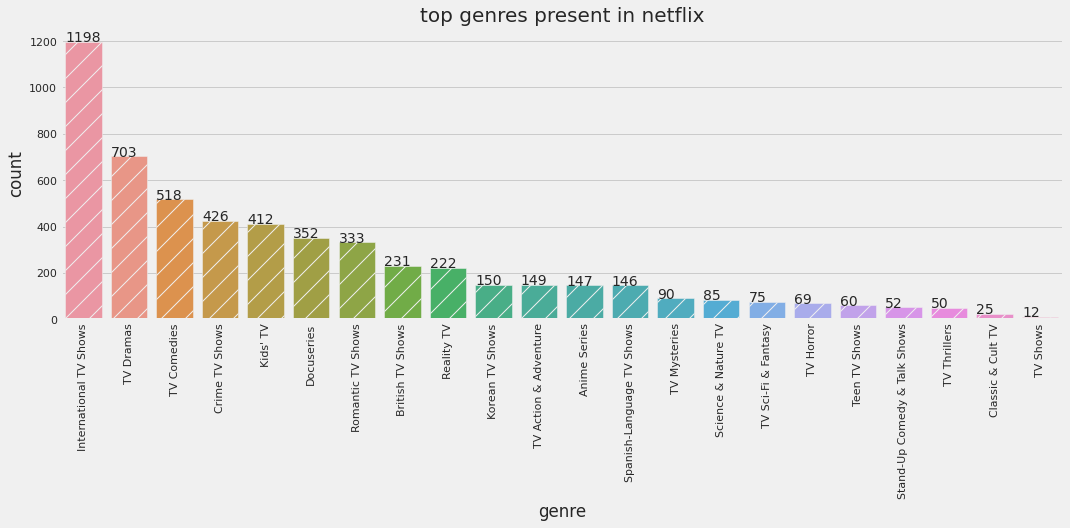

In [ ]:
# Chart - 12 visualization code

# Analysing top 10 "TV geners" genre

# plotting graph
plt.figure(figsize=(16,5))
graph = sns.barplot(x='genre', y='count', data = tv_genres,hatch='/')
graph.set_title('top genres present in netflix', size=20)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.show()

##### 1. Why did you pick the specific chart?

The countplot is primarily used to display observational counts in different category-based bins using bars. In simple words a count plot can be thought of as a histogram across a categorical, instead of quantitative, variable it provides observations in each categorical bin using bars. The basic API and options are identical to those for barplot.

##### 2. What is/are the insight(s) found from the chart?

**1.**For **Movies** it seems that people shows there major interest over International Movies followed by Dramas.

**2.**For **TV Shows** International TV Shows is the most popular genre.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Movies/Tv Shows and marketing campaigns share much in common – both must have a believable premise, a compelling narrative, and interesting content. However, a key difference exits in how movies and marketing are defined. Movies are most often defined by genre (action, comedy, drama), while marketing campaigns reflect the medium they use (print, TV, online, mixed), maintaining the correlation between the two helps in growth.

## **Directors Column:**

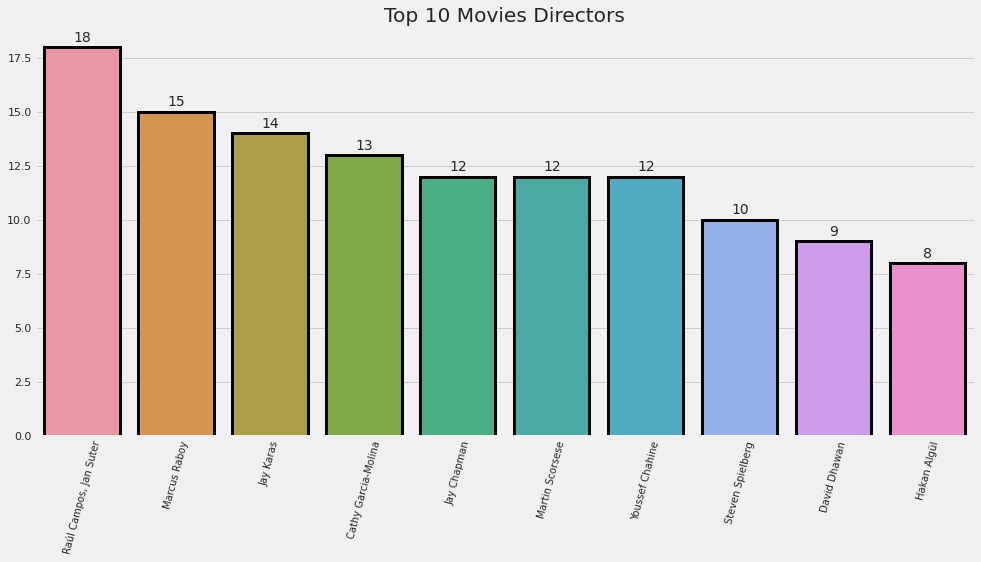

In [ ]:
# Chart - 13 visualization code

# Top 10 Movies Directors
plt.figure(figsize=(15,7))
plt.style.use('fivethirtyeight')
x = movies['director'].value_counts().index[1:11]
y = movies['director'].value_counts().values[1:11]
ax = sns.barplot(x,y,lw=3, ec='black')
plt.title('Top 10 Movies Directors')
plt.xticks(rotation = 75,fontsize=10)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10),
  textcoords = 'offset points')

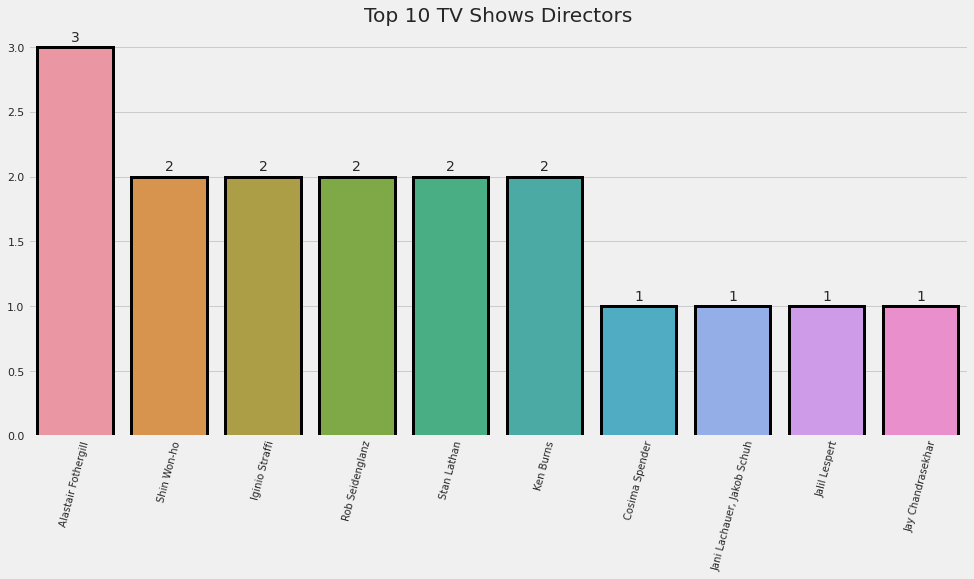

In [ ]:
# Chart - 14 visualization code

# Top 10 TV Shows Directors
plt.figure(figsize=(15,7))
plt.style.use('fivethirtyeight')
x = tv_shows['director'].value_counts().index[1:11]
y = tv_shows['director'].value_counts().values[1:11]
ax = sns.barplot(x,y,lw=3, ec='black')
plt.title('Top 10 TV Shows Directors')
plt.xticks(rotation = 75, fontsize=10)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10),
  textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

In determining the top directors for directing a Movie or a TV Show we have made the use of Barplot.

> The following reasons lead us to use Bar plot.

Bar plots are used with numerical or categorical data. It summarises the large set of data in simple visual form. Also it displays each category of data in a frequency distribution.

Large data can be easily summarized in visual form.

It displays relative numbers of multiple categories. Large data set in the visual form helps us to clarify trends better than tables.

Estimates key values at a glance and displays close numbers or proportions outline

##### 2. What is/are the insight(s) found from the chart?

**Raul Campos** and **Jan Suter** both have directed 18 **Movies**, also **Marcus Raboy** is not far behind and directed 15 **Movies**

**Alstair Fothergill** directed highest **TV Shows**  speifically speaking 3.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Film directors make creative decisions to determine the look of a movie, including those that impact the special effects, filming locations, shot angles, and actors’ performances. These professionals participate in virtually every phase of a filming project.

Directors are paid per project rather than receiving an annual salary. Some more established directors receive a percentage of their films’ box office earnings so selecting a directors whos' having a past history and creativity undoubtly creates an impact.

## **Actors Column:**

 **Leading Actors**

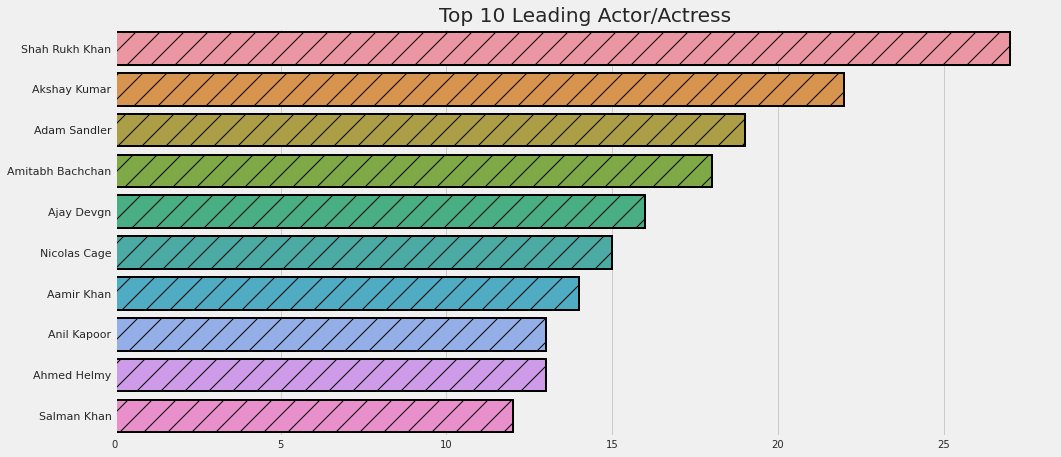

In [ ]:
# Chart - 15 visualization code

# Top 10 Actor/Actress in Lead Role in movies
plt.figure(figsize=(15,7))
x = movies['lead_actor'].value_counts().values[1:11]
y = movies['lead_actor'].value_counts().index[1:11]
ax = sns.barplot(x,y,lw=2, ec='black' , hatch='/')
plt.title('Top 10 Leading Actor/Actress')
plt.xticks(fontsize=10)
plt.show()

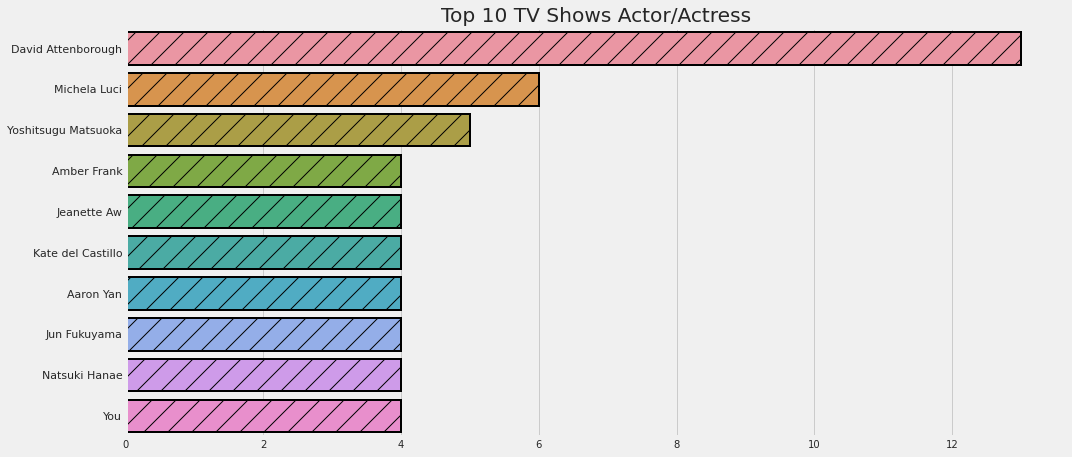

In [ ]:
# Chart - 16 visualization code

# Top 10 Actor/Actress in Lead Role in tv shows
plt.figure(figsize=(15,7))
y = tv_shows['lead_actor'].value_counts().index[1:11]
x = tv_shows['lead_actor'].value_counts().values[1:11]
ax = sns.barplot(x,y,lw=2, ec='black' , hatch='/')
plt.title('Top 10 TV Shows Actor/Actress')
plt.xticks(fontsize=10)
plt.show()

##### 1. Why did you pick the specific chart?

In both the cases we have made the use of Horizontal barplot.

A horizontal bar plot is a plot that presents quantitative data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

##### 2. What is/are the insight(s) found from the chart?

**1. In Movies**, According to the above barplot, **Shah Rukh Khan** has worked in over 27 (Lead Actor) films.
After Shah Rukh Khan, **Akshay Kumar** (Lead Actor) is ranked second, with 22 films under his belt.

2.From the graph we found the Actor who have appeared in the highest number of **TV shows** is **David Attenborough** and the other actor topping the list is **Michela Luci.**



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The ability of film stars to attract viewers is a widely accepted rationale for hiring actors who are having an influence in the society.

An impactful actor increase a film’s artistic appeal.

Facilitate the marketing campaigns of films

Facilitate the matching process with the right audiences

#### Chart - 14 - Correlation Heatmap

Here we will check the correlation present in between the Age content rating and the country.This will give an idea about, which content(i.e Age rating) is consumed the maximum in a country.

In [ ]:
# Creating a dictionary for rating_ages
rating_ages = {'TV-PG': 'Older Kids',
               'TV-MA': 'Adults',
               'TV-Y7-FV': 'Older Kids',
               'TV-Y7': 'Older Kids',
               'TV-14': 'Young Adults',
               'R': 'Adults',
               'TV-Y': 'Kids',
               'NR': 'Adults',
               'PG-13': 'Teens',
               'TV-G': 'Kids',
               'PG': 'Older Kids',
               'G': 'Kids',
               'UR': 'Adults',
               'NC-17': 'Adults'}

# Replacing with the new and general form
df['rating'].replace(rating_ages, inplace = True)
df['rating'].unique()

# Checking unique values for column age_rating
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [ ]:
# Preparing data for heatmap

df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

country_order = df['principal_country'].value_counts()[:11].index
content_data = df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

In [ ]:

df['count'] = 1
data = df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

Flix_df_heatmap = df.loc[df['principal_country'].isin(data)]
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['rating'],normalize = "index").T
Flix_df_heatmap


principal_country,Canada,France,India,Japan,Mexico,Missing,South Korea,Spain,United Kingdom,United States
rating,,,,,,,,,,
Adults,0.467181,0.627551,0.259414,0.368644,0.764228,0.320158,0.463918,0.797619,0.526042,0.489051
Kids,0.150579,0.086735,0.015690,0.008475,0.016260,0.169960,0.046392,0.035714,0.078125,0.074731
Older Kids,0.220077,0.112245,0.163180,0.275424,0.089431,0.235178,0.123711,0.053571,0.184028,0.196038
Teens,0.027027,0.030612,0.004184,0.012712,0.016260,0.005929,0.000000,0.017857,0.071181,0.098366
Young Adults,0.135135,0.142857,0.557531,0.334746,0.113821,0.268775,0.365979,0.095238,0.140625,0.141814


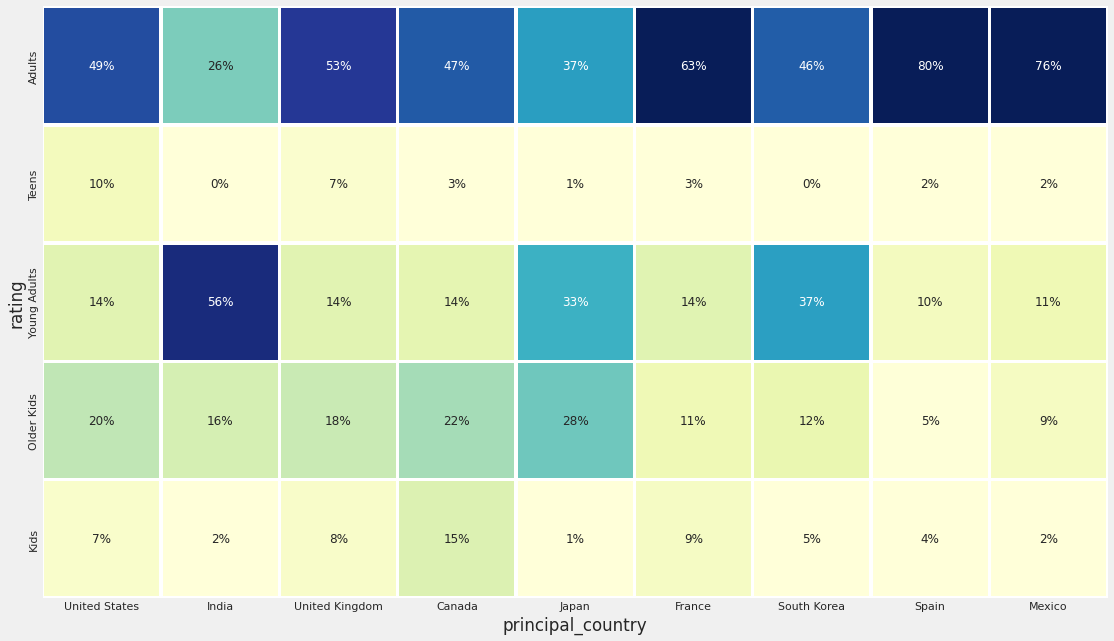

In [ ]:
# Correlation Heatmap visualization code


# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(17, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(Flix_df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

The main reasons for using the heat map are:

Heatmaps give an instant overview of key web performance parameters.

Heatmaps provide a visual approach to understanding numeric values.

Heatmaps help companies make informed choices that improve the bottom line.

##### 2. What is/are the insight(s) found from the chart?

We clearly can see  that US and UK are closely aligned with their Netflix target ages(i.e in all the age_rating).

Also, Adult content is the highest in almost every country with an exception in india where the young adult is the highest.



# **Hypothesis Testing**

Creating a Class for calculation the parameters

In [ ]:
# Parameter class

class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [ ]:
# Calculating Variance and Z distribution

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)

Creating a function to calculate P-value

In [ ]:
# function to calculate p value

def p_value(z,tailed):
  z = zcdf(z)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

Function to give conclusion about the Hypothesis based on P-value

In [ ]:
# Conclusion about P-value

def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis."
  else:
    return f"Null Hypothesis rejected "

In [ ]:
# Initializing the class
findz = findz()

### Hypothetical Statement

The average duration of Movies released on Netflix is **90 min**.





#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 90

Alternate Hypothesis : N != 90

Test Type: Two Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

hypo = df["duration"].str.extract('(\d+)').rename(columns={0:"duration"})

# Getting the required parameter values for hypothesis testing

hypothesis_number = 32

sample_mean = hypo["duration"].mean()

size = len(hypo["duration"])

std = (variance(pd.to_numeric(hypo["duration"])))**0.5

In [ ]:
# Getting Z value

z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value

p = p_value(z = z, tailed='d')

# Getting Conclusion

print(conclusion(p))

Null Hypothesis rejected 


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis is rejected and The average duration of Movies released on Netflix is **not** 90 min.

# **Data Processing**

(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# Using the original dataset for clustering and creating a copy to work forward
Netflix_df = df.copy()

In [ ]:
# Filling the null values
Netflix_df.fillna('',inplace=True)

**Our plan from here is to create a column that will include all the necessary column information to create of clusters we have considerd director,cast,country,listed_in and description to our final column namely clusters.**

In [ ]:
# Combining all the clustering attributes into a single column

Netflix_df['clusters'] = (Netflix_df['director'] + ' ' +
                                Netflix_df['cast'] +' ' +
                                Netflix_df['country'] +' ' +
                                Netflix_df['listed_in'] +' ' +
                                Netflix_df['description'])

In [ ]:
# Just checking the 10th row of clustering column
Netflix_df['clusters'][10]

"Zak Hilditch Thomas Jane, Molly Parker, Dylan Schmid, Kaitlyn Bernard, Bob Frazer, Brian d'Arcy James, Neal McDonough United States Dramas, Thrillers A farmer pens a confession admitting to his wife's murder, but her death is just the beginning of a macabre tale. Based on Stephen King's novella."

## **Removing Punctuations**

Having knowledge of regular expression will help to code faster and easier. To remove the punctuations is very helpful because it doesn't hold any vital information if we keep more than one punctuation in the word.

Also,Removing punctuation is a common pre-processing step in natural language processing (NLP) tasks. Punctuation marks like periods, commas, and exclamation points can add noise to the data and can sometimes be treated as separate tokens, which can affect the performance of NLP models.

In [ ]:
# Remove Punctuations

# Function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
Netflix_df['clusters'] = Netflix_df['clusters'].apply(remove_punctuation)

In [ ]:
# Checking with 10th row
Netflix_df['clusters'][10]

'Zak Hilditch Thomas Jane Molly Parker Dylan Schmid Kaitlyn Bernard Bob Frazer Brian dArcy James Neal McDonough United States Dramas Thrillers A farmer pens a confession admitting to his wifes murder but her death is just the beginning of a macabre tale Based on Stephen Kings novella'

## **Removing non-ASCII characters**

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
Netflix_df['clusters'] = remove_non_ascii(Netflix_df['clusters'])

In [ ]:
# Checking with 10th row
Netflix_df['clusters'][10]

'Zak Hilditch Thomas Jane Molly Parker Dylan Schmid Kaitlyn Bernard Bob Frazer Brian dArcy James Neal McDonough United States Dramas Thrillers A farmer pens a confession admitting to his wifes murder but her death is just the beginning of a macabre tale Based on Stephen Kings novella'

## **Removing stopwords**

Removing stop words and lowercasing words are common pre-processing steps in natural language processing (NLP) tasks.

**Stop words** are words that are commonly used in a language but do not convey much meaning on their own, such as "a," "an," "the," and "is." These words can add noise to the data and can sometimes affect the performance of NLP models, so they are often removed as a pre-processing step

By **lower casing** text, we get rid of any distractions and inconsistencies in case that could affect Machine Learning algorithms. Lower casing all text is a good way to ensure that different versions of the same word are not being fed to NLP algorithms because of mixed cases.

In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords

sentences = stopwords.words('english')

# displaying the stopwords
np.array(sentences)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words

def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words

    text = [word.lower() for word in text.split() if word.lower() not in sentences]

    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stopwords
Netflix_df['clusters'] = Netflix_df['clusters'].apply(remove_stopwords)

In [ ]:
# Checking with 10th row
Netflix_df['clusters'][10]

'zak hilditch thomas jane molly parker dylan schmid kaitlyn bernard bob frazer brian darcy james neal mcdonough united states dramas thrillers farmer pens confession admitting wifes murder death beginning macabre tale based stephen kings novella'

## **Lemmatization**

**Lemmatization** is the grouping together of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results. Because search engine algorithms use lemmatization, the user is free to query any inflectional form of a word and get relevant results. For example, if the user queries the plural form of a word (e.g., dancing), the search engine knows to also return relevant content that uses the singular form of the same word (dance).

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
# function to lemmatize the corpus
def lemmatize_(sent):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmat = []
    for word in sent:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmat.append(lemma)
    return lemmat

In [ ]:
# Lemmatization
Netflix_df['clusters'] = lemmatize_(Netflix_df['clusters'])

In [ ]:
# Checking with 10th row
Netflix_df['clusters'][10]

'zak hilditch thomas jane molly parker dylan schmid kaitlyn bernard bob frazer brian darcy james neal mcdonough united states dramas thrillers farmer pens confession admitting wifes murder death beginning macabre tale based stephen kings novella'

## **Tokenization**

Tokenization, when applied to dataset, is the process of substituting a sensitive data element with a non-sensitive equivalent, referred to as a token, that has no intrinsic or exploitable meaning or value. The token is a reference that maps back to the sensitive data through a tokenization system.

In [ ]:
from nltk import word_tokenize, sent_tokenize, TweetTokenizer

In [ ]:
# Creating a reference variable for Class TweetTokenizer

tokenizer = TweetTokenizer()

In [ ]:
# Tokenization

Netflix_df['clusters'] = Netflix_df['clusters'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
# Checking with 10th row
print(Netflix_df['clusters'][10])

['zak', 'hilditch', 'thomas', 'jane', 'molly', 'parker', 'dylan', 'schmid', 'kaitlyn', 'bernard', 'bob', 'frazer', 'brian', 'darcy', 'james', 'neal', 'mcdonough', 'united', 'states', 'dramas', 'thrillers', 'farmer', 'pens', 'confession', 'admitting', 'wifes', 'murder', 'death', 'beginning', 'macabre', 'tale', 'based', 'stephen', 'kings', 'novella']


## **Vectorization**

Text Vectorization is the process of converting text into numerical representation.This is important in NLP tasks because most machine learning models expect numerical input and cannot work with raw text data directly. Word vectorization allows you to input the words into a machine learning model in a way that preserve the meaning and context of the words. Word vectorization can also be used to measure the similarity between words using vector arithmetic.

We will be using TF-IDF for Text vectorization:

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

*   TF = (Number of times term t appears in a document) / (Total number of terms in the document)
*   IDF = log(Total number of documents/Number of documentswith the term in it)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Using TFIDF vectorizer to vectorize the corpus

# Tokenization
def tokenizer(text):
  return text

tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words='english', lowercase=False,max_features = 20000)
x = tfidf.fit_transform(Netflix_df['clusters'])

In [ ]:
# Dataset Rows & Columns count
x.shape

(7777, 20000)

In [ ]:
# converting X into array form
X = x.toarray()

In [ ]:
# Checking the matrix
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## **Principal Component Analysis**

**Principal component analysis**, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# using PCA to reduce dimensionality

pca = PCA(random_state=40)
pca.fit(X)

PCA(random_state=40)

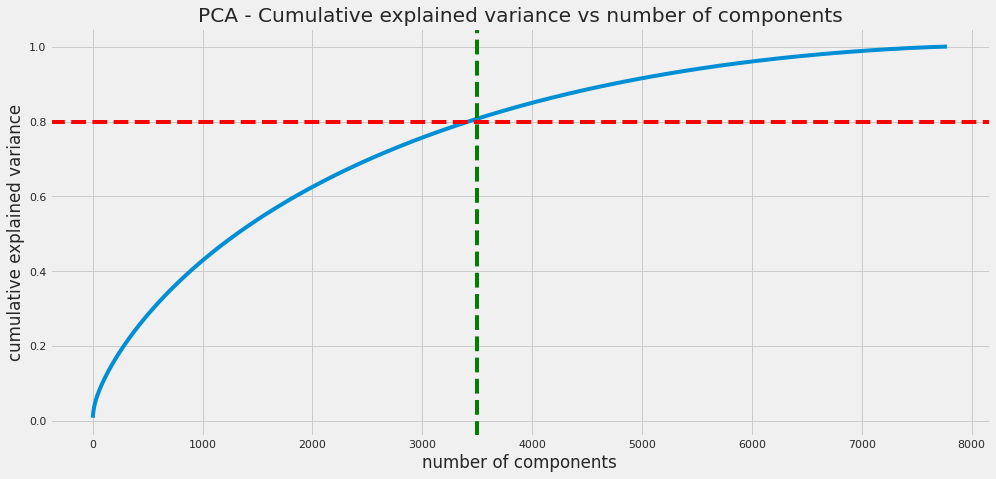

In [ ]:
# Explained variance

plt.figure(figsize=(15,7))

# Plot showing Cumulative explained variance vs number of components'
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.80, color='red', linestyle='--')
plt.axvline(x= 3500, color='green', linestyle='--')
plt.show()

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=3500,random_state=40)
pca.fit(X)

PCA(n_components=3500, random_state=40)

In [ ]:
# transformed features
X_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
X_pca.shape

(7777, 3500)

# **ML Model Implementation**

## **Kmeans**

**k-means clustering** is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

The working of the K-Means algorithm:

Step-1: Select the number K to decide the number of clusters.

Step-2: Select random K points or centroids. (It can be other from the input dataset).

Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.

Step-4: Calculate the variance and place a new centroid of each cluster.

Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to FINISH.(refered from Javatpoint)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# ML Model - 1 Implementation

# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,21):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(X_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)


Elbow Method Plot

The **Elbow method** is a graphical representation of finding the optimal ‘K’ in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

The elbow graph shows WCSS values(on the y-axis) corresponding to the different values of K(on the x-axis). When we see an elbow shape in the graph, we pick the K-value where the elbow gets created. We can call this point the Elbow point. Beyond the Elbow point, increasing the value of ‘K’ does not lead to a significant reduction in WCSS.

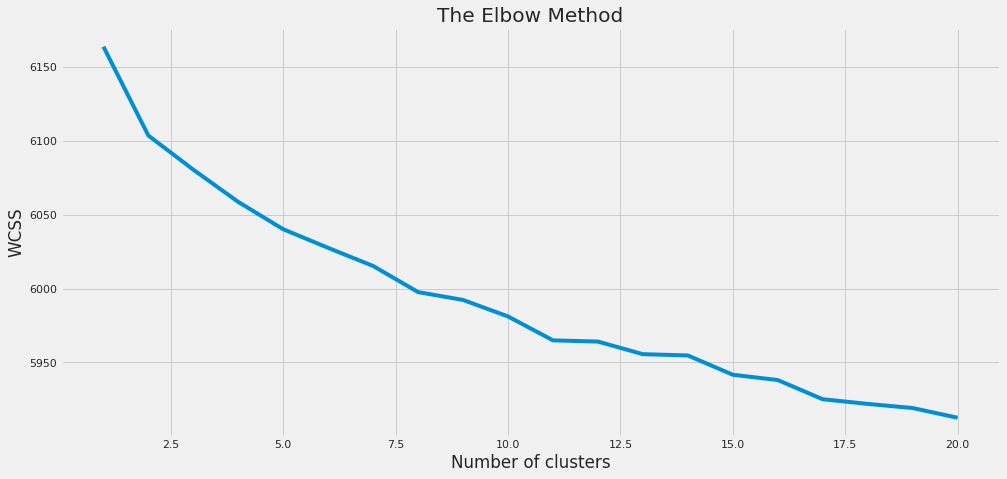

In [ ]:
# Plot determining the optimal number of cluster using Elbow method

number_clusters = range(1,21)
plt.figure(figsize=(15,7))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette score

The **Silhouette score** in the K-Means clustering algorithm is between -1 and 1. This score represents how well the data point has been clustered, and scores above 0 are seen as good, while negative points mean your K-means algorithm has put that data point in the wrong cluster.

In [ ]:
# Plotting Silhouette score for different number of clusters

range_n_clusters = range(2,21)
silhouette = []
for clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters = clusters,init='k-means++',random_state=33)
  kmeans.fit(X_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette.append(silhouette_score(X_pca, cluster_labels))


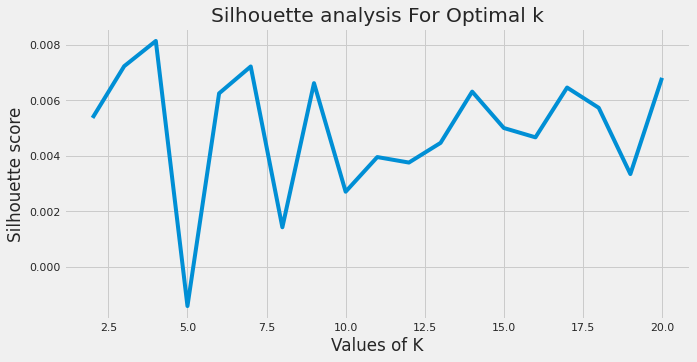

In [ ]:
# Plot determining the optimal number of cluster using silhouette score

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

From the above understanding i.e using Elbow method and silhoutte score we came to this conclusion that for our dataset the optimal number of cluster will be **4**.

In [ ]:
# Clustering the data into 4 clusters
kmeans = KMeans(n_clusters = 4,init='k-means++',random_state=40)
kmeans.fit(X_pca)

KMeans(n_clusters=4, random_state=40)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X_pca, kmeans.labels_)

print(kmeans_distortion)
print(kmeans_silhouette_score)

6058.52678015953
0.00803467924199666


In [ ]:
# Adding a kmeans cluster number attribute
df['clusters'] = kmeans.labels_

In [ ]:
# Checking the dataset
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'clusters']]

,type,title,director,cast,country,rating,listed_in,description,clusters
5920,Movie,Surga Yang Tak Dirindukan 2,"Hanung Bramantyo, Meisa Felaroze","Fedi Nuril, Raline Shah, Laudya Cynthia Bella,...",Indonesia,Young Adults,"Dramas, Faith & Spirituality, International Mo...","In this sequel to the award-winning 2015 film,...",1
4726,TV Show,"Pablo Escobar, el patrón del mal",Missing,"Andrés Parra, Angie Cepeda, Cecilia Navia, Vic...",Colombia,Adults,"Crime TV Shows, International TV Shows, Spanis...",From his days as a petty thief to becoming hea...,2
6405,TV Show,The Good Place,Missing,"Kristen Bell, Ted Danson, William Jackson Harp...",United States,Young Adults,TV Comedies,"Due to an error, self-absorbed Eleanor Shellst...",3
1724,Movie,Dev.D,Anurag Kashyap,"Abhay Deol, Mahie Gill, Kalki Koechlin, Sindba...",India,Adults,"Dramas, International Movies, Romantic Movies","Because they come from different castes, the s...",1
1229,Movie,Casa de mi Padre,Matt Piedmont,"Will Ferrell, Gael García Bernal, Diego Luna, ...","United States, Mexico",Adults,Comedies,Will Ferrell stars as a Spanish-speaking cowbo...,3


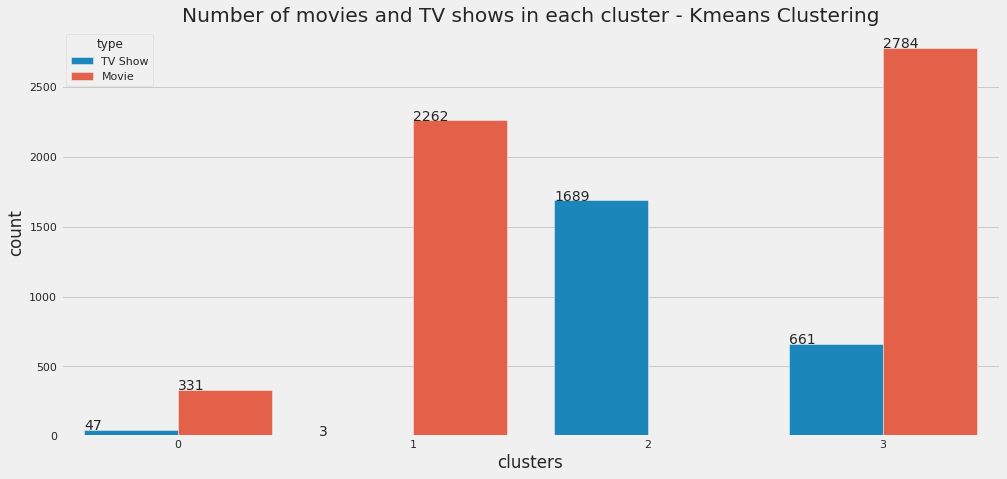

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(15,7))
graph = sns.countplot(x='clusters',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

## **Hierarchical clustering**

**Hierarchical clustering** is a method for grouping objects. It creates groups so that objects within a group are similar to each other and different from objects in other groups. Clusters are visually represented in a hierarchical tree called a dendrogram.

The type that we are focusing is Agglomerative Hierarchical Clustering.

Hierarchical clustering employs a measure of distance/similarity to create new clusters. Steps for Agglomerative clustering can be summarized as follows:

Step 1: Compute the proximity matrix using a particular distance metric

Step 2: Each data point is assigned to a cluster

Step 3: Merge the clusters based on a metric for the similarity between clusters

Step 4: Update the distance matrix

Step 5: Repeat Step 3 and Step 4 until only a single cluster remains

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

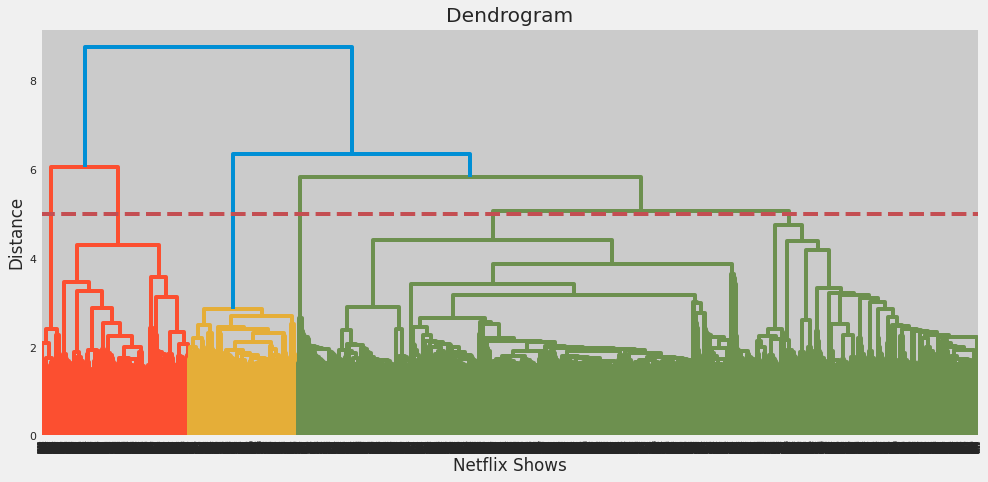

In [ ]:
# Building a dendogram to decide the number of clusters

plt.figure(figsize=(15, 7))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 5, color='r', linestyle='--')
plt.show()

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(X)

array([0, 0, 0, ..., 2, 1, 2])

In [ ]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
# Checking the dataset
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

,type,title,director,cast,country,rating,listed_in,description,hierarchical_cluster
2695,TV Show,"Hello, My Twenties!",Missing,"Ye-ri Han, Seung-Yeon Han, Eun-bin Park, Hwa-y...",South Korea,Adults,"International TV Shows, Korean TV Shows, Roman...","With different personalities, life goals and t...",3
5948,Movie,Swordfish,Dominic Sena,"John Travolta, Hugh Jackman, Halle Berry, Don ...",United States,Adults,Action & Adventure,Determined to get his mitts on $9 billion in a...,2
247,Movie,A Very Murray Christmas,Sofia Coppola,"Bill Murray, Miley Cyrus, George Clooney, Chri...",United States,Young Adults,"Comedies, Music & Musicals",Bill Murray rounds up an all-star cast for an ...,2
1522,TV Show,Crazy Delicious,Missing,"Jayde Adams, Carla Hall, Heston Blumenthal, Ni...",United Kingdom,Older Kids,"British TV Shows, International TV Shows, Real...","In this competition show, daring home chefs te...",1
5638,Movie,Sister Cities,Sean Hanish,"Jacki Weaver, Troian Bellisario, Stana Katic, ...",United States,Adults,Dramas,"After years of estrangement, four sisters gath...",2


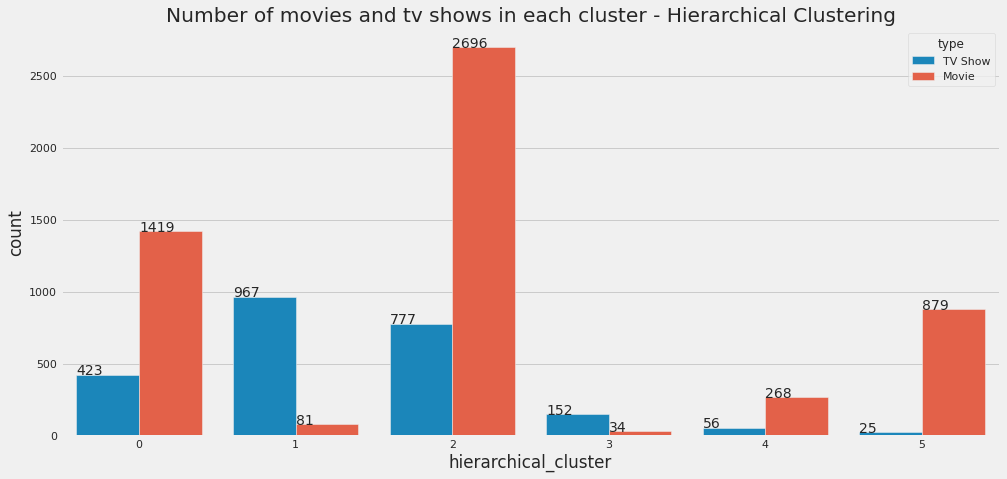

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(15,7))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

## **Content based recommendation system**

Content-based recommendation systems, recommends items to the user based on the similarities of item of interest. By similarity it means description or features that an item consists.

> Our approach will be:

* We will build a  content based recommender system based on the similarity
of the Movies and TV Shows.
* Any user who has watched or searched any show on Netflix, the recommender system should be able to recommend the similar shows on the basis of users liking.

* To get the similarity score in between the shows, we will use cosine similarity.
* The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value.


* Therefore based onto the nearest vectors(means by the distance) the system will recommend the content.












In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly
recommender_df[['show_id', 'title', 'description']]

,show_id,title,description
0,s1,3%,In a future where the elite inhabit an island ...
1,s2,7:19,After a devastating earthquake hits Mexico Cit...
2,s3,23:59,"When an army recruit is found dead, his fellow..."
3,s4,9,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,21,A brilliant group of students become card-coun...
...,...,...,...
7772,s7783,Zozo,When Lebanon's Civil War deprives Zozo of his ...
7773,s7784,Zubaan,A scrappy but poor boy worms his way into a ty...
7774,s7785,Zulu Man in Japan,"In this documentary, South African rapper Nast..."
7775,s7786,Zumbo's Just Desserts,Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
print(f"before reset index id for movie 'Black Panther' : {df[df['title'] == 'Black Panther'].index[0]}")  # index[0] --> to locate index position
print(f"after reset index id for movie 'Black Panther': {recommender_df[recommender_df['title'] == 'Black Panther'].index[0]}")

before reset index id for movie 'Black Panther' : 959
after reset index id for movie 'Black Panther': 957


In [ ]:
# calling out transformed array independent features created from cluster column after performing PCA for dimenssionality reduction.
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[1.        , 0.06793493, 0.0245105 , ..., 0.00880414, 0.03026957,
        0.00408165],
       [0.06793493, 1.        , 0.00568607, ..., 0.03974721, 0.00224612,
        0.        ],
       [0.0245105 , 0.00568607, 1.        , ..., 0.00700908, 0.00214806,
        0.        ],
       ...,
       [0.00880414, 0.03974721, 0.00700908, ..., 1.        , 0.00958976,
        0.09377641],
       [0.03026957, 0.00224612, 0.00214806, ..., 0.00958976, 1.        ,
        0.00444587],
       [0.00408165, 0.        , 0.        , ..., 0.09377641, 0.00444587,
        1.        ]])

In [ ]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [ ]:
recommend('Happy New Year')

If you liked 'Happy New Year', you may also enjoy: 

Om Shanti Om
Main Hoon Na
Don 2
My Next Guest with David Letterman and Shah Rukh Khan
Kabhi Haan Kabhi Naa
Chennai Express
Don
Kabhi Alvida Naa Kehna
Chaahat
7 Khoon Maaf


In [ ]:
recommend('The Witcher')

If you liked 'The Witcher', you may also enjoy: 

The Witcher: A Look Inside the Episodes
Making The Witcher
Wanderlust
Love & Anarchy
Ripper Street
The Road to Calvary
The Day Will Come
Hot Property
The Tudors
Mohawk


In [ ]:
recommend('Inception')

If you liked 'Inception', you may also enjoy: 

Peaky Blinders
Before the Flood
Dead in a Week (Or Your Money Back)
Transcendence
There's Something in the Water
Brick
Æon Flux
Dragonheart
Dragonheart: A New Beginning
Solomon Kane


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we worked on a clustering problem wherein we had classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other.

**Imp Insights from EDA:**


1. Movies and TV Shows on Netflix are in ratio 7/3. And TV Shows have long way to catch upto the number of Movies.
2. Most content on Netflix is from United States followed by India and United Kingdom.
3. Raul Campos and Jan Suter together directed 18 movies. We can observe some other great names such as Jay Chapman, Martin Scorsese and Steven Spielberg in top 20 directors list.
4. International movies is the top genre followed by Dramas and Comedies.
5. Most movies are of length ~100 mins while most TV Shows have only one season.
6. Most content o Netflix is rated for mature audience only.
7. Love,Christmas, World, Man, Story are the top 5 most occurring words from the complete vocabulary of description.
8. From October to January, maximum number of movies and TV shows were added on the platform.

**Clustering process:**
* Initially we have  decided to cluster the data on the basis of some  attributes like: director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

* Through TFIDF Vectorization, we created a total of 20000 attributes.We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 3500 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 3500.

*  We first built clusters using the K-Means Clustering algorithm, and using elbow method and silhouette score analysis the optimal number of clusters came out to be 4.

*  Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained after visualizing the dendrogram.

*  A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched or searched.


### ***Hurrah! We have successfully completed your Machine Learning Capstone Project !!!***